**You will find here all the results related to the third approach in the Black & Scholes model.**


In [ ]:
import numpy as np
import pandas as pd
# We import from assets all the parameters for the B&S model
from assets import N, S0, Neuler, T,G
from tensorflow import keras

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score

from model import DNN
from numpy.linalg import matrix_rank
from scipy.linalg import null_space
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal
from numpy.linalg import inv
import seaborn as sns
import joblib
import scipy.stats as sps
from assets import f_Call_Basket, f_Put_Worst_Of, f_Digit_Basket,f_Asian_Arithmetic



In [ ]:
nb_samples = 500000
M_simulation = 100000
sns.set(style="darkgrid")

In [ ]:
def Analytic_EHZ(b1, b2, W1, W2):
    """
    Input:
        b1.shape = n
        b2.shape = 1
        W1.shape = n, N
        W2.shape = 1, n
    Output: 
        output.shape = 1
    """
    n = W1.shape[0]
    inter = np.zeros(n)
    for i in range(n):
        mu_i = b1[i]
        sigma_i = np.linalg.norm(W1[i])
        inter[i] = sigma_i * np.exp(-0.5 * (mu_i / sigma_i)**2) / np.sqrt(2 * np.pi) + mu_i * (1-sps.norm.cdf(-mu_i / sigma_i))
    return W2 @ inter + b2

In [ ]:
def get_params_simulation(model):
    W1 = model.get_weights()[0].T
    b1 = model.get_weights()[1].reshape(-1,1)
    W2 = model.get_weights()[2].T
    b2 = model.get_weights()[3][0]
    return W1,b1,W2,b2

In [ ]:
def simulation(f, mean_EHZ, model, N = N):
      
    Z_simul = multivariate_normal.rvs(cov = np.diag(np.ones(N)), size=M_simulation)
    y = f(Z_simul)
    
    Z_simul = multivariate_normal.rvs(cov = np.diag(np.ones(N)), size=M_simulation)
    HZ = model.predict(Z_simul)
    Y_control = f(Z_simul).reshape(HZ.shape) - HZ  + mean_EHZ
    return y, Y_control

In [ ]:
def plot_simulation(y, Y_control, bins = [100,100, 100,100]):
    plt.figure(figsize=(20,6))
    plt.subplot(1,3,1)
    plt.hist(y, bins = bins[0], label = 'mean = %.3f\nvar = %.5f'%(y.mean(), y.var()))
    plt.title('distribution of the initial_variable')
    plt.legend()
    plt.subplot(1,3,2)
    plt.hist(Y_control, bins = bins[1], label = 'mean = %.3f\nvar = %.5f'%(Y_control.mean(), Y_control.var()), color='orange')
    plt.title('distribution using control variate')
    plt.legend()
    plt.subplot(1,3,3)
    plt.hist(y, bins = bins[2], label = 'initial variable')
    plt.hist(Y_control,bins = bins[3], label = "control variate ", color='orange')
    plt.title('comparaison of distribution')
    plt.legend()
    plt.show()

# Basket Call Option

### 1. Data generation
we generate 500000 samples for our training and test set

In [ ]:
Z = multivariate_normal.rvs(cov = np.diag(np.ones(N)), size=nb_samples)
y = f_Call_Basket(Z)
X_train, X_test, y_train, y_test = train_test_split(Z, y, test_size=0.2)

### 2. Model Creation

In [ ]:
nnmodel_basket = DNN(N, other_layer = 1, neurone_by_layer = 64, with_linear= False,metric="mae")

In [ ]:
nnmodel_basket.fit(X_train, y_train, eval_set=(X_test,y_test), verbose = True, patience = 10)

Epoch 1/1000
12500/12500 [==============================] - 10s 782us/step - loss: 8.2052 - mae: 1.0858 - val_loss: 1.3015 - val_mae: 0.5461
Epoch 2/1000
12500/12500 [==============================] - 10s 766us/step - loss: 1.3929 - mae: 0.5349 - val_loss: 0.6194 - val_mae: 0.3596
Epoch 3/1000
12500/12500 [==============================] - 10s 790us/step - loss: 0.9520 - mae: 0.4402 - val_loss: 0.6249 - val_mae: 0.3751
Epoch 4/1000
12500/12500 [==============================] - 10s 793us/step - loss: 0.7930 - mae: 0.4011 - val_loss: 0.5914 - val_mae: 0.3646
Epoch 5/1000
12500/12500 [==============================] - 10s 781us/step - loss: 0.6934 - mae: 0.3836 - val_loss: 0.6146 - val_mae: 0.3448
Epoch 6/1000
12500/12500 [==============================] - 10s 797us/step - loss: 0.6237 - mae: 0.3676 - val_loss: 1.0744 - val_mae: 0.5018
Epoch 7/1000
12500/12500 [==============================] - 10s 780us/step - loss: 0.6563 - mae: 0.3846 - val_loss: 0.5330 - val_mae: 0.3564
Epoch 8/1000


Epoch 59/1000
12500/12500 [==============================] - 10s 825us/step - loss: 0.3487 - mae: 0.2875 - val_loss: 0.2823 - val_mae: 0.2604
Epoch 60/1000
12500/12500 [==============================] - 11s 840us/step - loss: 0.3434 - mae: 0.2873 - val_loss: 0.2514 - val_mae: 0.2536
Epoch 61/1000
12500/12500 [==============================] - 11s 860us/step - loss: 0.3576 - mae: 0.2911 - val_loss: 0.3828 - val_mae: 0.3330
Epoch 62/1000
12500/12500 [==============================] - 10s 832us/step - loss: 0.3399 - mae: 0.2864 - val_loss: 0.2396 - val_mae: 0.2487
Epoch 63/1000
12500/12500 [==============================] - 10s 819us/step - loss: 0.3520 - mae: 0.2882 - val_loss: 0.2452 - val_mae: 0.2581
Epoch 64/1000
12500/12500 [==============================] - 10s 792us/step - loss: 0.3410 - mae: 0.2865 - val_loss: 0.2944 - val_mae: 0.2756
Epoch 65/1000
12500/12500 [==============================] - 10s 814us/step - loss: 0.3542 - mae: 0.2910 - val_loss: 0.3104 - val_mae: 0.2806
Epoch 

### 3. Test  and evaluation of the model
We evaluate our model using Mean Absolute Error:  
    - first we generate a test set sample  
    - then we predict and evaluate the model

In [ ]:
Z = multivariate_normal.rvs(cov = np.diag(np.ones(N)), size=M_simulation)
y = f_Call_Basket(Z)
y_pred = nnmodel_basket.model.predict(Z)

3125/3125 [==============================] - 2s 504us/step


In [ ]:
mean_absolute_error(y, y_pred)

0.2830441388135609

### 4. Simulation

In [ ]:
#get the parameters
W1,b1,W2,b2 = get_params_simulation(nnmodel_basket.model)
mean_EHZ = Analytic_EHZ(b1, b2, W1, W2)[0]

In [ ]:
y, Y_control = simulation(f_Call_Basket, mean_EHZ, nnmodel_basket.model)

3125/3125 [==============================] - 2s 530us/step


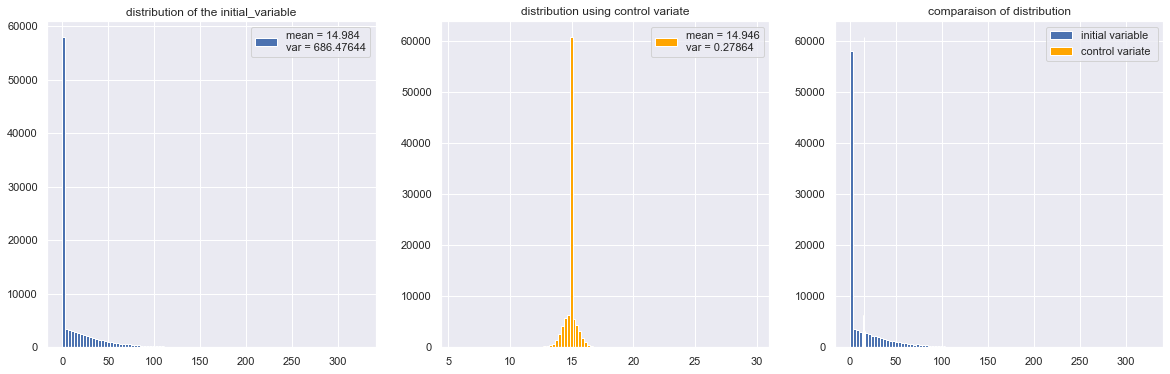

In [ ]:
plot_simulation(y, Y_control)

# Put  Worst_Of  Option

### 1. Data generation
we generate 500000 samples for our training and test set

In [ ]:
Z = multivariate_normal.rvs(cov = np.diag(np.ones(N)), size=nb_samples)
y = f_Put_Worst_Of(Z)
X_train, X_test, y_train, y_test = train_test_split(Z, y, test_size=0.2)

### 2. Model Creation

In [ ]:
nnmodel_worst = DNN(N, other_layer = 1, neurone_by_layer = 64, with_linear= False,metric="mae")

In [ ]:
nnmodel_worst.fit(X_train, y_train, eval_set=(X_test,y_test), verbose = True, patience = 10)

### 3. Test  and evaluation of the model
We evaluate our model using Mean Absolute Error:  
    - first we generate a test set sample  
    - then we predict and evaluate the model

In [ ]:
Z = multivariate_normal.rvs(cov = np.diag(np.ones(N)), size=M_simulation)
y = f_Put_Worst_Of(Z)
y_pred = nnmodel_worst.model.predict(Z)

3125/3125 [==============================] - 2s 522us/step


In [ ]:
mean_absolute_error(y, y_pred)

2.850313809484617

### 4. Simulation

In [ ]:
#get the parameters
W1,b1,W2,b2 = get_params_simulation(nnmodel_worst.model)
mean_EHZ = Analytic_EHZ(b1, b2, W1, W2)[0]

In [ ]:
y, Y_control = simulation(f_Put_Worst_Of, mean_EHZ, nnmodel_worst.model)

3125/3125 [==============================] - 2s 543us/step


#### **K = S0**

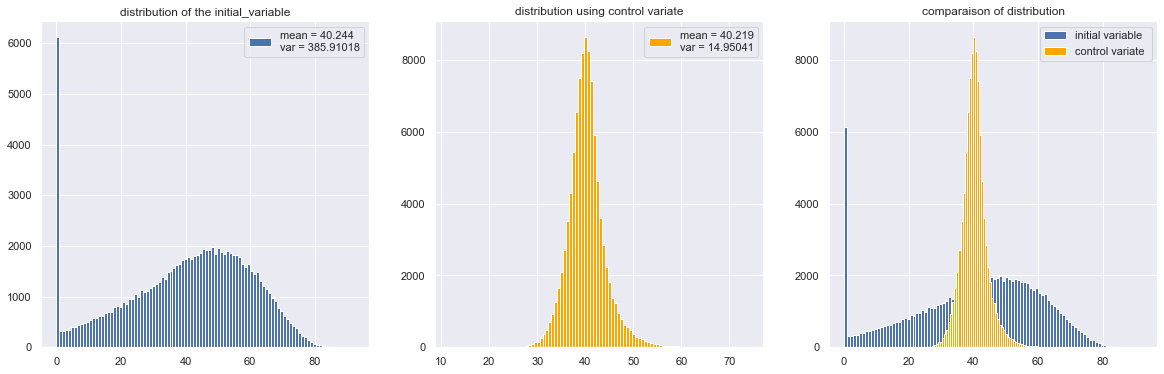

In [ ]:
plot_simulation(y, Y_control)

# Binary option (a digit) on the basket

### 1. Data generation

In [ ]:
Z = multivariate_normal.rvs(cov = np.diag(np.ones(N)), size=M_simulation)
y = f_Digit_Basket(Z)
X_train, X_test, y_train, y_test = train_test_split(Z, y, test_size=0.2)

### 2. Model Creation

In [ ]:
nnmodel_binary = DNN(N, other_layer = 1, neurone_by_layer = 64, with_linear= False)

In [ ]:
nnmodel_binary.fit(X_train, y_train, eval_set=(X_test,y_test), verbose = True)

Epoch 1/1000
2500/2500 [==============================] - 2s 815us/step - loss: 619.6989 - mse: 619.6989 - val_loss: 210.8081 - val_mse: 210.8081
Epoch 2/1000
2500/2500 [==============================] - 2s 800us/step - loss: 177.4208 - mse: 177.4208 - val_loss: 160.7699 - val_mse: 160.7699
Epoch 3/1000
2500/2500 [==============================] - 2s 838us/step - loss: 143.0715 - mse: 143.0715 - val_loss: 141.0055 - val_mse: 141.0055
Epoch 4/1000
2500/2500 [==============================] - 2s 803us/step - loss: 129.0800 - mse: 129.0800 - val_loss: 138.4932 - val_mse: 138.4932
Epoch 5/1000
2500/2500 [==============================] - 2s 775us/step - loss: 120.0721 - mse: 120.0721 - val_loss: 117.9867 - val_mse: 117.9867
Epoch 6/1000
2500/2500 [==============================] - 2s 777us/step - loss: 114.4262 - mse: 114.4262 - val_loss: 105.5800 - val_mse: 105.5800
Epoch 7/1000
2500/2500 [==============================] - 2s 780us/step - loss: 108.0928 - mse: 108.0928 - val_loss: 113.466

2500/2500 [==============================] - 2s 871us/step - loss: 54.4829 - mse: 54.4829 - val_loss: 64.0619 - val_mse: 64.0619
Epoch 59/1000
2500/2500 [==============================] - 2s 916us/step - loss: 53.3083 - mse: 53.3083 - val_loss: 66.0772 - val_mse: 66.0772
Epoch 60/1000
2500/2500 [==============================] - 2s 957us/step - loss: 52.0058 - mse: 52.0058 - val_loss: 65.0562 - val_mse: 65.0562
Epoch 61/1000
2500/2500 [==============================] - 2s 880us/step - loss: 52.0781 - mse: 52.0781 - val_loss: 64.5534 - val_mse: 64.5534
Epoch 62/1000
2500/2500 [==============================] - 2s 883us/step - loss: 51.1678 - mse: 51.1678 - val_loss: 64.6113 - val_mse: 64.6113
Epoch 63/1000
2500/2500 [==============================] - 2s 834us/step - loss: 51.3102 - mse: 51.3102 - val_loss: 64.0160 - val_mse: 64.0160
Epoch 64/1000
2500/2500 [==============================] - 3s 1ms/step - loss: 51.1357 - mse: 51.1357 - val_loss: 67.6701 - val_mse: 67.6701
Epoch 65/1000
2

### 3. Test  and evaluation of the model

In [ ]:
Z = multivariate_normal.rvs(cov = np.diag(np.ones(N)), size=M_simulation)
y = f_Digit_Basket(Z)
y = y != 0
y_pred = nnmodel_binary.model.predict(Z)
y_pred = y_pred > G/2

3125/3125 [==============================] - 2s 526us/step


In [ ]:
accuracy_score(y, y_pred)

0.99526

### 4. Simulation

In [ ]:
#get the parameters
W1,b1,W2,b2 = get_params_simulation(nnmodel_binary.model)
mean_EHZ = Analytic_EHZ(b1, b2, W1, W2)[0]

In [ ]:
Z_simul = multivariate_normal.rvs(cov = np.diag(np.ones(N)), size=M_simulation)
y = f_Digit_Basket(Z_simul)
    
Z_simul = multivariate_normal.rvs(cov = np.diag(np.ones(N)), size=M_simulation)
HZ = nnmodel_binary.model.predict(Z_simul)
Y_control = f_Digit_Basket(Z_simul).reshape(HZ.shape) - G*(HZ>G/2)  + mean_EHZ #our model was 

3125/3125 [==============================] - 2s 530us/step


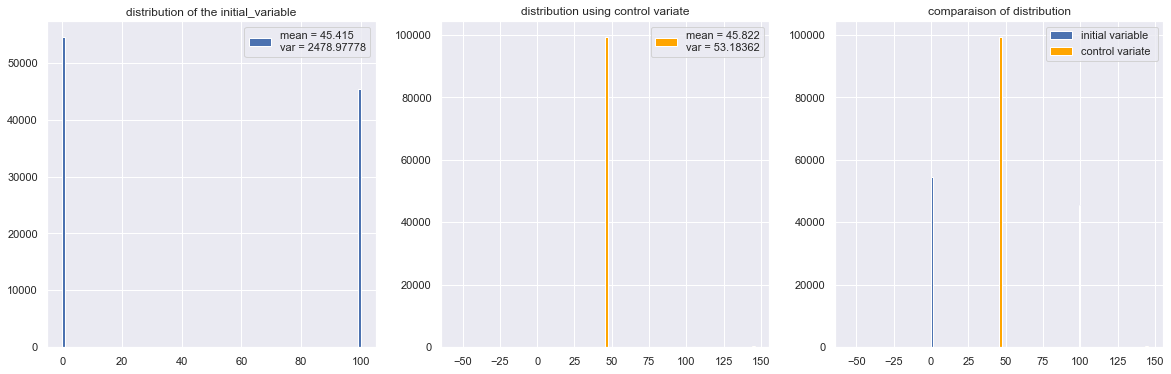

In [ ]:
plot_simulation(y, Y_control)

# Arithmetic asian option

### 1. Data generation

In [ ]:
Z = np.random.randn(nb_samples, N * Neuler)
y = f_Asian_Arithmetic(Z)
X_train, X_test, y_train, y_test = train_test_split(Z, y, test_size=0.2)

### 2. Model Creation

In [ ]:
nnmodel_asian = DNN(N * Neuler, other_layer = 1, neurone_by_layer = 64, with_linear= False)

In [ ]:
nnmodel_asian.fit(X_train, y_train, eval_set=(X_test,y_test), verbose = True, patience = 10)

Epoch 1/1000
2500/2500 [==============================] - 9s 3ms/step - loss: 18.3079 - mse: 18.3079 - val_loss: 5.2098 - val_mse: 5.2098
Epoch 2/1000
2500/2500 [==============================] - 8s 3ms/step - loss: 5.9089 - mse: 5.9089 - val_loss: 3.2609 - val_mse: 3.2609
Epoch 3/1000
2500/2500 [==============================] - 11s 4ms/step - loss: 4.8210 - mse: 4.8210 - val_loss: 3.7563 - val_mse: 3.7563
Epoch 4/1000
2500/2500 [==============================] - 8s 3ms/step - loss: 4.2656 - mse: 4.2656 - val_loss: 3.1230 - val_mse: 3.1230
Epoch 5/1000
2500/2500 [==============================] - 6s 3ms/step - loss: 3.3944 - mse: 3.3944 - val_loss: 2.7150 - val_mse: 2.7150
Epoch 6/1000
2500/2500 [==============================] - 5s 2ms/step - loss: 2.6701 - mse: 2.6701 - val_loss: 3.6703 - val_mse: 3.6703
Epoch 7/1000
2500/2500 [==============================] - 5s 2ms/step - loss: 2.2390 - mse: 2.2390 - val_loss: 1.2164 - val_mse: 1.2164
Epoch 8/1000
2500/2500 [=====================

### 3. Test  and evaluation of the model
We evaluate our model using Mean Absolute Error:  
    - first we generate a test set sample  
    - then we predict and evaluate the model

In [ ]:
Z = np.random.randn(M_simulation, N * Neuler)
y = f_Asian_Arithmetic(Z)
y_pred = nnmodel_asian.model.predict(Z)

3125/3125 [==============================] - 5s 1ms/step


In [ ]:
mean_squared_error(y, y_pred)

0.8142900070973564

### 4. Simulation

In [ ]:
#get the parameters
W1,b1,W2,b2 = get_params_simulation(nnmodel_asian.model)
mean_EHZ = Analytic_EHZ(b1, b2, W1, W2)[0]

In [ ]:
y, Y_control = simulation(f_Asian_Arithmetic, mean_EHZ, nnmodel_asian.model, N = N * Neuler)

3125/3125 [==============================] - 6s 2ms/step


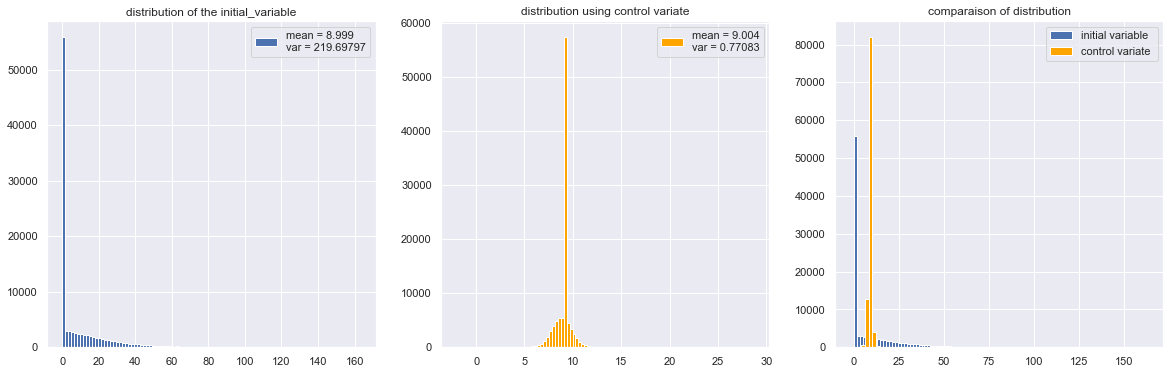

In [ ]:
plot_simulation(y, Y_control, [100, 100, 100, 15])